<a href="https://colab.research.google.com/github/Anoop-1061/Phishing-Detection-using-Machine-Learning/blob/master/run_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [2]:
dataset = "Dataset.csv"
class_labels = "Target_Labels.csv"
test_size = 0.3

In [3]:
X = pd.read_csv(dataset)
Y = pd.read_csv(class_labels)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= test_size, random_state=42)

In [4]:
model_nn = MLPClassifier(activation='logistic', alpha=1.1, random_state=42)
model_nn.fit(X_train,y_train)
Y_predicted = model_nn.predict(X_test)
acc_nn = metrics.accuracy_score(y_test,Y_predicted)*100
print ("Neural Network accuracy = "+str(round(acc_nn,2))+"%")

confusion_mat = confusion_matrix(y_test,Y_predicted)

print (confusion_mat)
print (confusion_mat.shape)

print ("TP\tFP\tFN\tTN\tSensitivity\tSpecificity")
for i in range(confusion_mat.shape[0]):
# i means which class to choose to do one-vs-the-rest calculation
# rows are actual obs whereas columns are predictions
  TP = round(float(confusion_mat[i,i]),2)  # correctly labeled as i
  FP_nn = round(float(confusion_mat[:,i].sum()),2) - TP  # incorrectly labeled as i
  FN_nn = round(float(confusion_mat[i,:].sum()),2) - TP  # incorrectly labeled as non-i
  TN = round(float(confusion_mat.sum().sum()),2) - TP - FP_nn - FN_nn
  sensitivity_nn = round(TP / (TP + FN_nn),2)
  # plt.figure(figsize=(15,10))
  # plt.bar(ML_Model, sensitivity)
  specificity = round(TN / (TN + FP_nn),2)
  print (str(TP)+"\t"+str(FP_nn)+"\t"+str(FN_nn)+"\t"+str(TN)+"\t"+str(sensitivity_nn)+"\t\t"+str(specificity)+"\t\t")

#print ("\t"+str(sensitivity)+"\t\t"+str(specificity)+"\t\t")

f_score = metrics.f1_score(y_test,Y_predicted)
print(f_score)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural Network accuracy = 86.61%
[[1225  230]
 [ 214 1648]]
(2, 2)
TP	FP	FN	TN	Sensitivity	Specificity
1225.0	214.0	230.0	1648.0	0.84		0.89		
1648.0	230.0	214.0	1225.0	0.89		0.84		
0.881283422459893


In [5]:
model_rf = RandomForestClassifier(n_estimators=2, max_depth=5, random_state=42)
model_rf.fit(X_train,y_train)
Y_predicted = model_rf.predict(X_test)
model_rf.feature_importances_
acc_rf = metrics.accuracy_score(y_test,Y_predicted)*100
#print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print ("Random Forest accuracy = "+str(round(acc_rf,2))+"%")

confusion_mat = confusion_matrix(y_test,Y_predicted)

print (confusion_mat)
print (confusion_mat.shape)

print ("TP\tFP\tFN\tTN\tSensitivity\tSpecificity")
for i in range(confusion_mat.shape[0]):
# i means which class to choose to do one-vs-the-rest calculation
# rows are actual obs whereas columns are predictions
  TP = round(float(confusion_mat[i,i]),2)  # correctly labeled as i
  FP_rf = round(float(confusion_mat[:,i].sum()),2) - TP  # incorrectly labeled as i
  FN_rf = round(float(confusion_mat[i,:].sum()),2) - TP  # incorrectly labeled as non-i
  TN = round(float(confusion_mat.sum().sum()),2) - TP - FP_rf - FN_rf
  sensitivity_rf = round(TP / (TP + FN_rf),2)
  # plt.figure(figsize=(15,10))
  # plt.bar(ML_Model, sensitivity)
  specificity = round(TN / (TN + FP_rf),2)
  print (str(TP)+"\t"+str(FP_rf)+"\t"+str(FN_rf)+"\t"+str(TN)+"\t"+str(sensitivity_rf)+"\t\t"+str(specificity)+"\t\t")

#print ("\t"+str(sensitivity)+"\t\t"+str(specificity)+"\t\t")

f_score = metrics.f1_score(y_test,Y_predicted)
print(f_score)

Random Forest accuracy = 86.1%
[[1127  328]
 [ 133 1729]]
(2, 2)
TP	FP	FN	TN	Sensitivity	Specificity
1127.0	133.0	328.0	1729.0	0.77		0.93		
1729.0	328.0	133.0	1127.0	0.93		0.77		
0.8823679510079102


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [6]:
model_svm = svm.SVC(kernel='linear', C=1.5, gamma='scale', random_state=42)
model_svm.fit(X_train,y_train)
Y_predicted = model_svm.predict(X_test)
acc_svm = metrics.accuracy_score(y_test,Y_predicted)*100
print ("SVM accuracy = "+str(round(acc_svm,2))+"%")

confusion_mat = confusion_matrix(y_test,Y_predicted)

print (confusion_mat)
print (confusion_mat.shape)

print ("TP\tFP\tFN\tTN\tSensitivity\tSpecificity")
for i in range(confusion_mat.shape[0]):
# i means which class to choose to do one-vs-the-rest calculation
# rows are actual obs whereas columns are predictions
  TP = round(float(confusion_mat[i,i]),2)  # correctly labeled as i
  FP_svm = round(float(confusion_mat[:,i].sum()),2) - TP  # incorrectly labeled as i
  FN_svm = round(float(confusion_mat[i,:].sum()),2) - TP  # incorrectly labeled as non-i
  TN = round(float(confusion_mat.sum().sum()),2) - TP - FP_svm - FN_svm
  sensitivity_svm = round(TP / (TP + FN_svm),2)
  # plt.figure(figsize=(15,10))
  # plt.bar(ML_Model, sensitivity)
  specificity = round(TN / (TN + FP_svm),2)
  print (str(TP)+"\t"+str(FP_svm)+"\t"+str(FN_svm)+"\t"+str(TN)+"\t"+str(sensitivity_svm)+"\t\t"+str(specificity)+"\t\t")

#print ("\t"+str(sensitivity)+"\t\t"+str(specificity)+"\t\t")

f_score = metrics.f1_score(y_test,Y_predicted)
print(f_score)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM accuracy = 87.58%
[[1209  246]
 [ 166 1696]]
(2, 2)
TP	FP	FN	TN	Sensitivity	Specificity
1209.0	166.0	246.0	1696.0	0.83		0.91		
1696.0	246.0	166.0	1209.0	0.91		0.83		
0.8916929547844374


In [7]:
#Generating weights for Javascript file for calculations 
model_svm.coef_

array([[ 3.51636530e-01, -1.11122735e-01, -7.59140945e-01,
         1.10968487e-01,  4.07041856e-01,  1.99965402e+00,
         4.81371767e-01, -2.40963503e-01,  1.94951414e-04,
         3.51717573e-01,  2.70288178e+00,  7.03045457e-01,
         5.18394086e-01,  3.70571554e-02,  1.85214881e-01,
        -1.48087980e-01]])

In [8]:
senty=[sensitivity_nn, sensitivity_rf, sensitivity_svm]
acc=[acc_nn, acc_rf, acc_svm]
fpr=[FP_nn, FP_rf, FP_svm]
fnr=[FN_nn, FN_rf, FN_svm]
ML_model=['Neural Network', 'Random Forest Classifier', 'Support Vector Machine']

<BarContainer object of 3 artists>

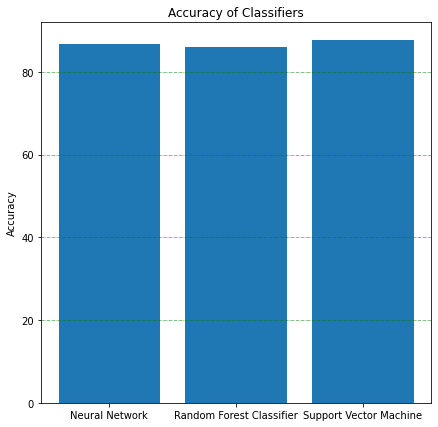

In [9]:
plt.figure(figsize=(7, 7))
plt.grid(which='major', linestyle='-.', linewidth='0.5', color='green', axis='y')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classifiers')
plt.bar(ML_model, acc)

<BarContainer object of 3 artists>

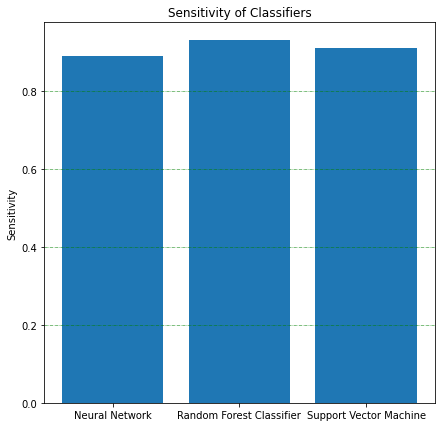

In [10]:
plt.figure(figsize=(7, 7))
plt.grid(which='major', linestyle='-.', linewidth='0.5', color='green', axis='y')
plt.ylabel('Sensitivity')
plt.title('Sensitivity of Classifiers')
plt.bar(ML_model, senty)

<BarContainer object of 3 artists>

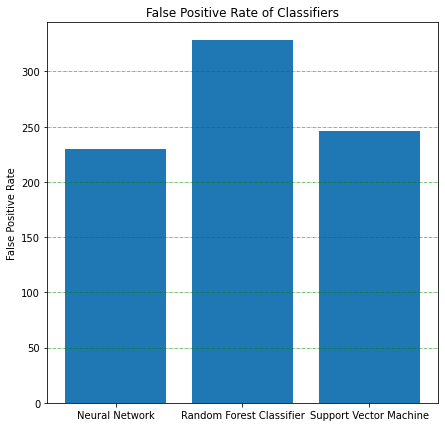

In [11]:
plt.figure(figsize=(7, 7))
plt.grid(which='major', linestyle='-.', linewidth='0.5', color='green', axis='y')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate of Classifiers')
plt.bar(ML_model, fpr)

<BarContainer object of 3 artists>

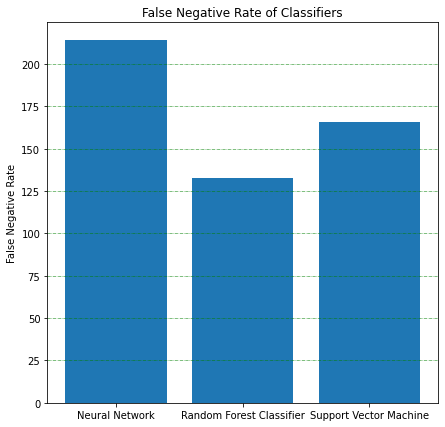

In [12]:
plt.figure(figsize=(7, 7))
plt.grid(which='major', linestyle='-.', linewidth='0.5', color='green', axis='y')
plt.ylabel('False Negative Rate')
plt.title('False Negative Rate of Classifiers')
plt.bar(ML_model, fnr)